In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from streamlit_jupyter import StreamlitPatcher, tqdm

StreamlitPatcher().jupyter()  # register streamlit with jupyter-compatible wrappers

C:\Users\Пользователь\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_salary = pd.read_csv('data_salary.csv', index_col='Год')
df_salary = df_salary.rename(columns={'Здравоохранение и предоставление социальных услуг': 'Социальная сфера'})
df_salary['ВВП'] = df_salary['ВВП'] * 1000000

Анализ зарплат в России

In [3]:
# Поправка на инфляцию
for column in df_salary.columns:
   if column not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB'):
    name = f'{column} с учетом инфл.'
    df_salary[name] = df_salary[column]*(1 - df_salary["Инфляция"]/100)
df_salary

,Всего по экономике,Строительство,Образование,Социальная сфера,Инфляция,ВВП,Родившиеся,USD/RUB,Всего по экономике с учетом инфл.,Строительство с учетом инфл.,Образование с учетом инфл.,Социальная сфера с учетом инфл.
Год,,,,,,,,,,,,
2000,2223.4,2639.8,1240.2,1333.3,20.20,7.305600e+09,1266800.0,28.12,1774.27320,2106.56040,989.67960,1063.97340
2001,3240.4,3859.3,1833.0,1959.9,18.58,8.943600e+09,1311604.0,29.17,2638.33368,3142.24206,1492.42860,1595.75058
2002,4360.3,4806.9,2927.3,3141.3,15.06,1.083050e+10,1396967.0,31.35,3703.63882,4082.98086,2486.44862,2668.22022
2003,5498.5,6176.7,3386.6,3662.6,11.99,1.320820e+10,1477301.0,30.69,4839.22985,5436.11367,2980.54666,3223.45426
2004,6739.5,7304.7,4203.4,4612.0,11.74,1.702720e+10,1502477.0,28.82,5948.28270,6447.12822,3709.92084,4070.55120
2005,8554.9,9042.8,5429.7,5905.6,10.91,2.160980e+10,1457376.0,28.29,7621.56041,8056.23052,4837.31973,5261.29904
2006,10633.9,10869.2,6983.3,8059.9,9.00,2.691720e+10,1479637.0,27.19,9676.84900,9890.97200,6354.80300,7334.50900
2007,13593.4,14333.4,8778.3,10036.6,11.87,3.324750e+10,1610122.0,25.58,11979.86342,12632.02542,7736.31579,8845.25558
2008,17290.1,18574.0,11316.8,13048.6,13.28,4.127680e+10,1713947.0,24.86,14993.97472,16107.37280,9813.92896,11315.74592


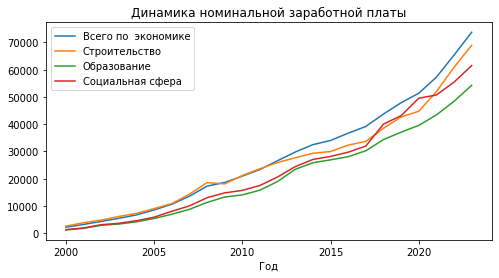

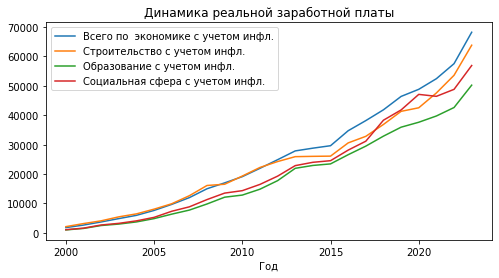

In [4]:
# Графики
col_without_infl = [col for col in df_salary.columns if ('инфл.' not in col) and (col not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB'))]
df_salary[col_without_infl].plot(kind='line', figsize=(8, 4), title='Динамика номинальной заработной платы')
plt.show()

col_infl = [col for col in df_salary.columns if 'инфл.' in col]
df_salary[col_infl].plot(kind='line', figsize=(8, 4), title='Динамика реальной заработной платы')
plt.show()

На графиках виден рост номинальной и реальной заработной платы работников как по экономике в целом, так и по отдельным отраслям

In [5]:
sector = ['Всего по  экономике', 'Строительство', 'Образование',
       'Социальная сфера']

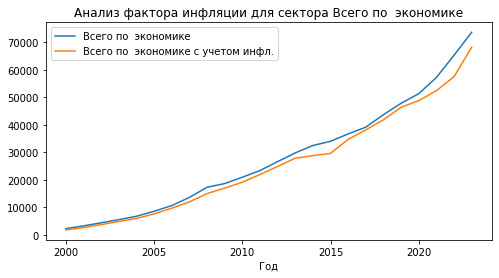

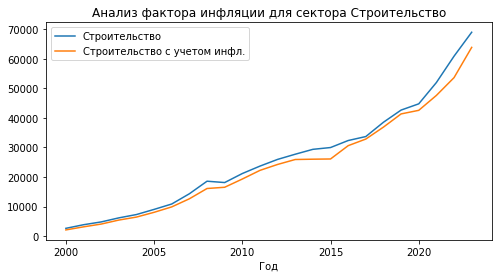

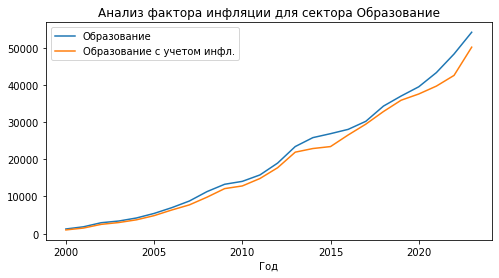

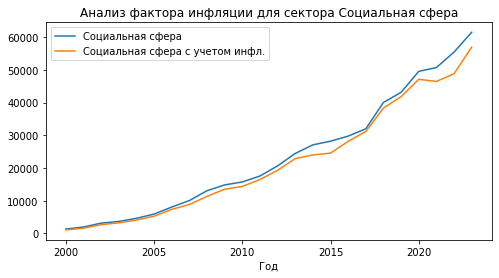

In [6]:
# Графики с учетом инфляции
# df_salary[status].plot(kind='line', figsize=(8, 4), title=status)
for status in sector: 
    status_infl = status + ' с учетом инфл.'
    title = f'Aнализ фактора инфляции для сектора {status}'
    df_salary[[status, status_infl]].plot(kind='line', figsize=(8, 4), title=title)
    plt.show()

In [7]:
# Рост от года к году в %
for column in df_salary.columns:
   if column not in ('Инфляция', 'ВВП', 'Родившиеся', 'USD/RUB') and ('инфл' not in column):
    name = f'{column} с учетом инфл.'
    column_name_infl = f'Рост реальной зарплаты {column}'
    df_salary[column_name_infl] = df_salary[name].pct_change()*100

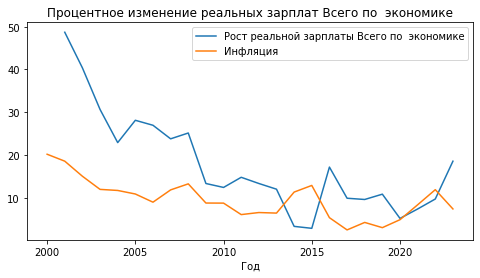

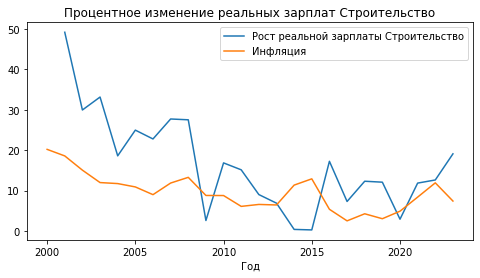

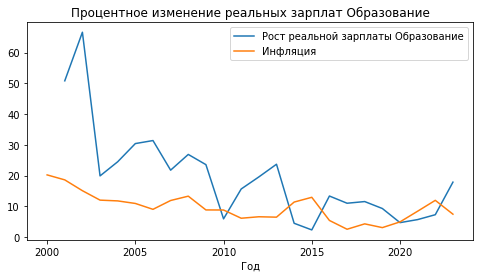

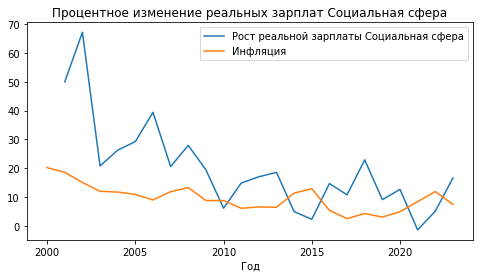

In [8]:
# График темпов роста
for status in sector: 
    name = f'Рост реальной зарплаты {status}'
    title = f'Процентное изменение реальных зарплат {status}'
    df_salary[[name, 'Инфляция']].plot(kind='line', figsize=(8, 4), title=title)
    plt.show()

Несмотря на рост реальных зарплат, темпы роста снизились относительно 2000-х и не всегда оказываются выше уроня инфляции

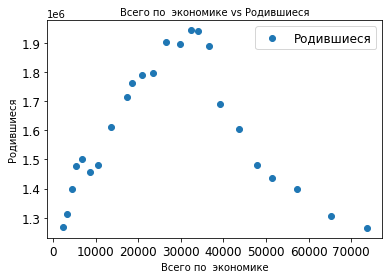

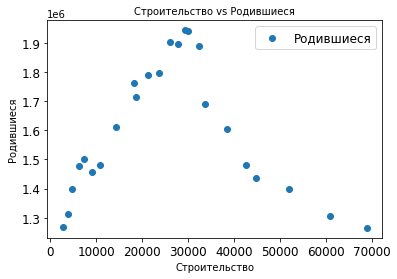

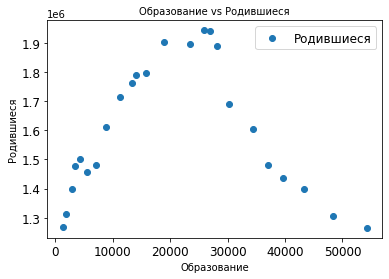

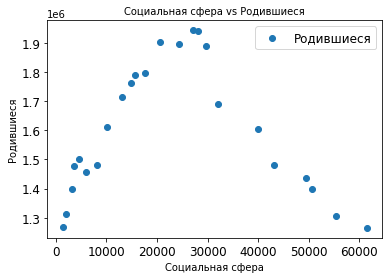

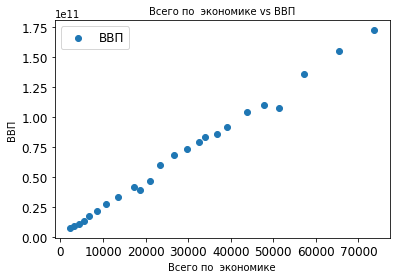

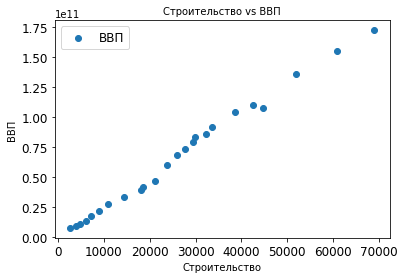

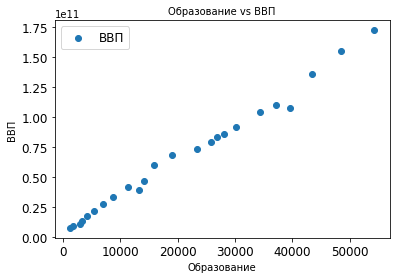

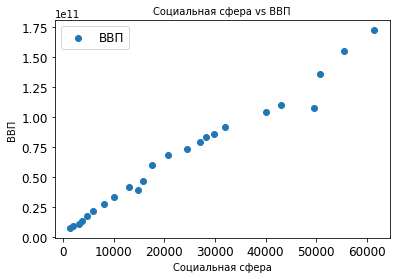

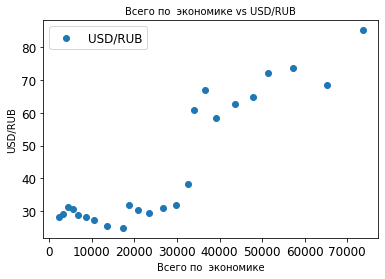

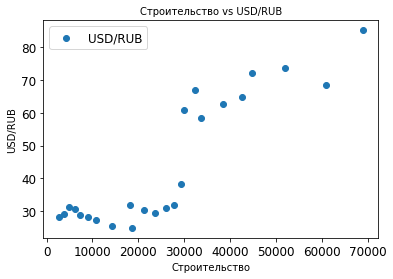

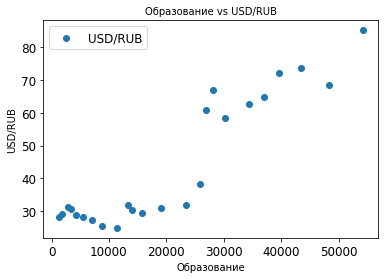

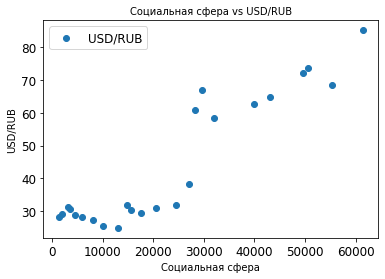

In [9]:
# Корреляция социальноэкономических покахателей с динамикой реальных зарплат
#Рассмотрим корреляцию социальноэкономических показателей с динамикой реальных зарплат
for status in sector: 
    plt.scatter(status, 'Родившиеся',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='Родившиеся')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs Родившиеся'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

for status in sector: 
    plt.scatter(status, 'ВВП',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='ВВП')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs ВВП'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

for status in sector: 
    plt.scatter(status, 'USD/RUB',
                data=df_salary)
    plt.gca().set(xlabel=status, ylabel='USD/RUB')

    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    title = f'{status} vs USD/RUB'
    plt.title(title, fontsize=10)
    plt.legend(fontsize=12)
    plt.show()

Можно заметить сильную положительную линейную зависимость реальных зарплат с ВВП, также существует положительная зависимость зарплат и среднего курса доллара к рублю. До определенного уровня зарплат наблюдается рост количества родившихся, но затем следует снижение, стоит учитывать влияние большого количества иных факторов на демографические показатели

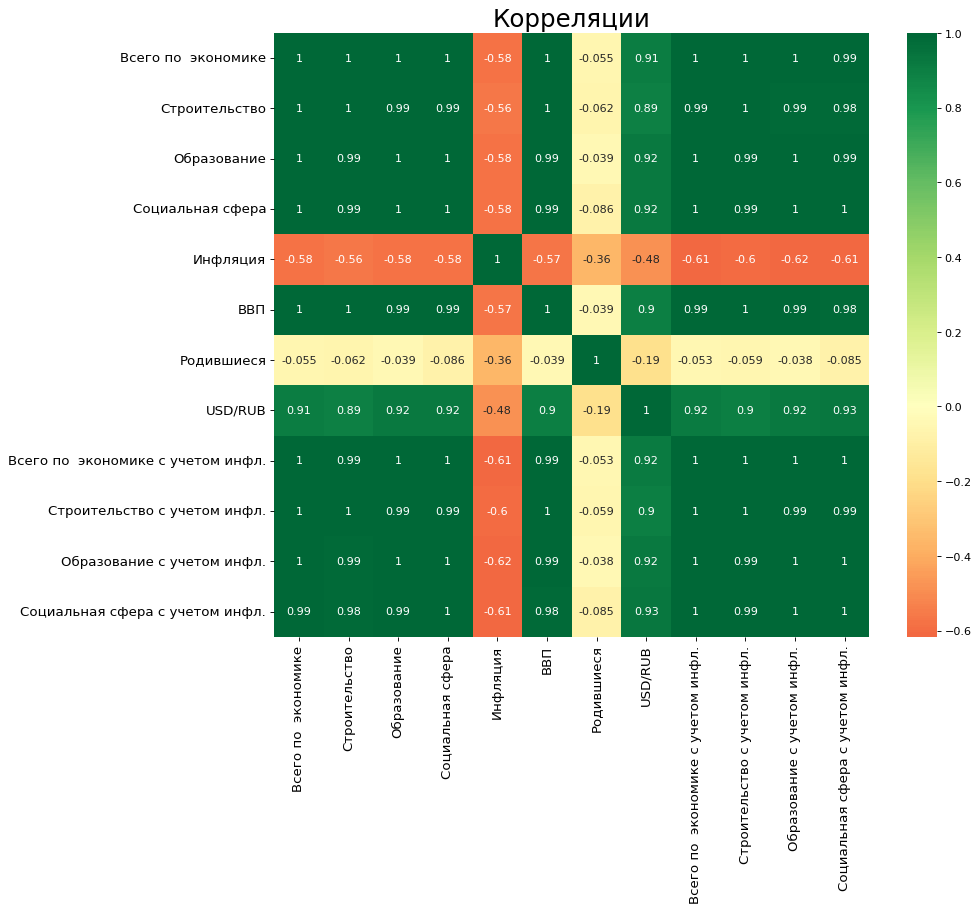

In [10]:
# Тепловая карта
plt.figure(figsize=(12,10), dpi= 80)
col = [col for col in df_salary.columns if 'Рост' not in col]
sns.heatmap(df_salary[col].corr(), xticklabels=df_salary[col].corr().columns, yticklabels=df_salary[col].corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()